In [191]:
import os
import cv2
import numpy as np
import argparse
import matplotlib.pyplot as plt
from utils import plot_image, load_image, save_mask

In [192]:
def get_number_of_closed_contours(contours):
    closed_contours = []
    for cnt in contours:
       if cv2.isContourConvex(cnt) == True:
          closed_contours.append(cnt)
       else:
          pass
    return len(closed_contours)

In [193]:
def find_laplacian_of_gaussian(image):
    blur = cv2.GaussianBlur(image,(3,3),0)
    laplacian = cv2.Laplacian(image, cv2.CV_16S, ksize=3)
    result = cv2.convertScaleAbs(laplacian, alpha=2)
    return result

In [194]:
def find_second_largest_contour(thresh):
    contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contoursSorted = sorted(contours, key=lambda x: cv2.contourArea(x))
    mask = np.zeros(thresh.shape, np.uint8)
    cv2.drawContours(mask, contoursSorted, len(contoursSorted)-2, 255, cv2.FILLED)
    return mask

def segment_image(image, raw_image, contrast_factors=[1.5, 0]):
    ret, thresh = cv2.threshold(image, 65, 200, 0)
#     ret, thresh = cv2.threshold(image, 65, 200, cv2.THRESH_BINARY_INV+cv.THRESH_OTSU)
    plot_image(thresh)
    
    thresh = np.bitwise_and(thresh, raw_image)
    ret, thresh = cv2.threshold(thresh, 40, 150, cv2.THRESH_BINARY)
    kernel = np.ones((3, 3),np.uint8)
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
    result = find_second_largest_contour(thresh)
    
    while((result > 0).sum() < 20000):
        kernel = np.ones((3, 3), np.uint8)
        thresh = cv2.dilate(thresh, kernel, iterations = 1)
        result = find_second_largest_contour(thresh)
        
    result = cv2.morphologyEx(result, cv2.MORPH_CLOSE, kernel)
    result = cv2.medianBlur(result, 17)
    result = cv2.morphologyEx(result, cv2.MORPH_CLOSE, kernel)
    return result


Dimension of Image: (843, 1246)


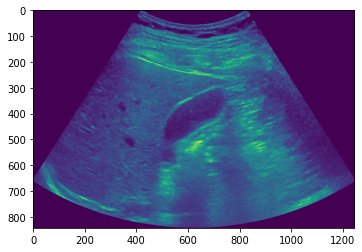

Image loaded...


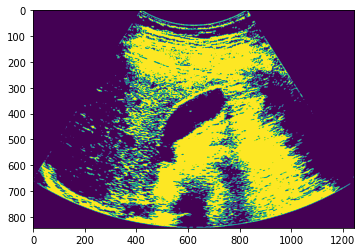

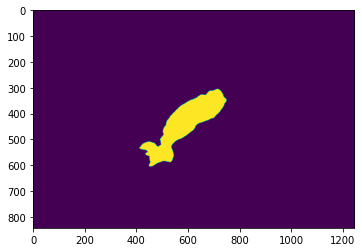

det/0005.png
Mask saved
++++++++++++++++++++++++++++++++++++++++++++++++++++++
Dimension of Image: (842, 1268)


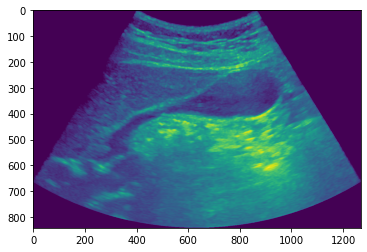

Image loaded...


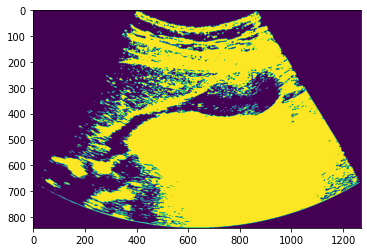

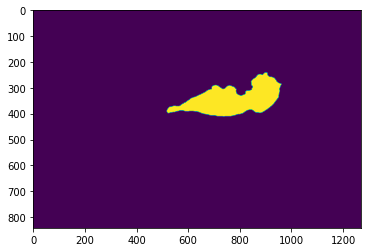

det/0009.png
Mask saved
++++++++++++++++++++++++++++++++++++++++++++++++++++++
Dimension of Image: (843, 1259)


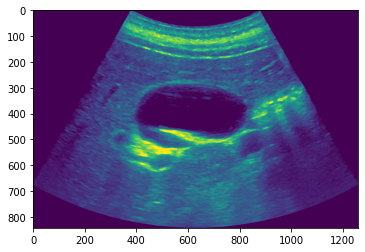

Image loaded...


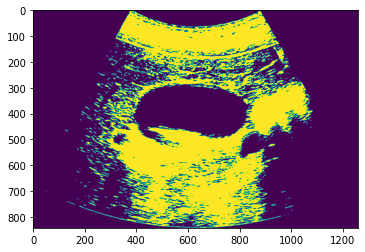

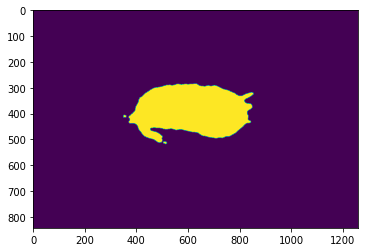

det/0008.png
Mask saved
++++++++++++++++++++++++++++++++++++++++++++++++++++++
Dimension of Image: (844, 1168)


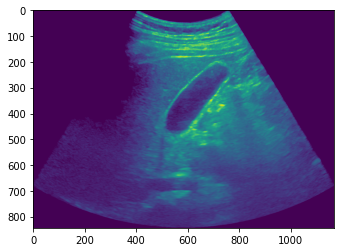

Image loaded...


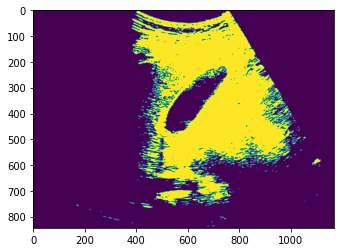

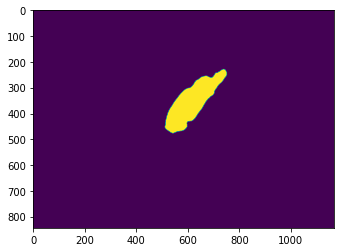

det/0001.png
Mask saved
++++++++++++++++++++++++++++++++++++++++++++++++++++++
Dimension of Image: (773, 1310)


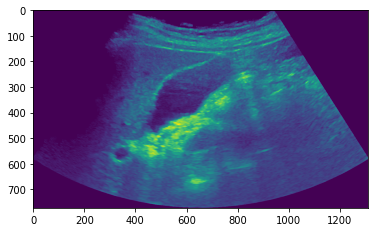

Image loaded...


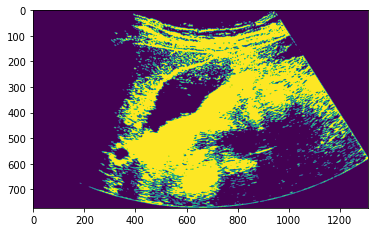

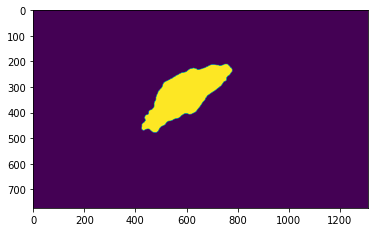

det/0003.png
Mask saved
++++++++++++++++++++++++++++++++++++++++++++++++++++++
Dimension of Image: (844, 1181)


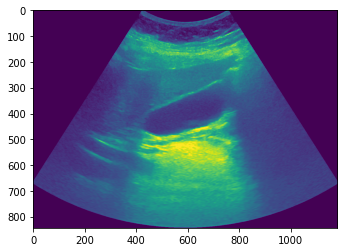

Image loaded...


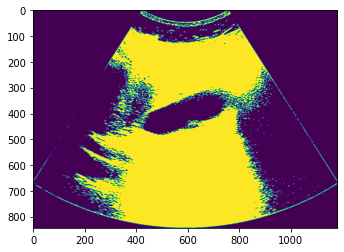

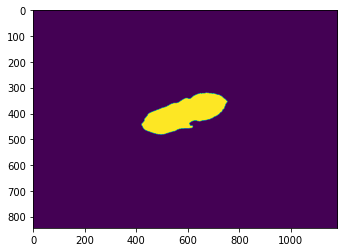

det/0000.png
Mask saved
++++++++++++++++++++++++++++++++++++++++++++++++++++++
Dimension of Image: (844, 1132)


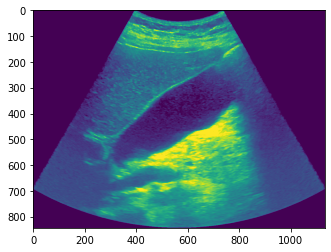

Image loaded...


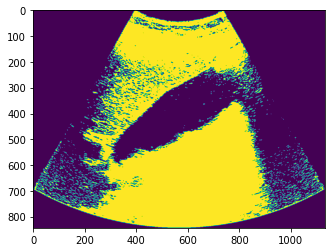

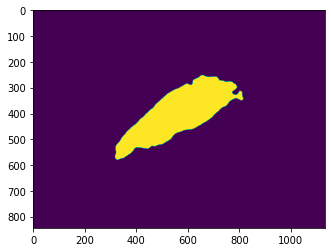

det/0006.png
Mask saved
++++++++++++++++++++++++++++++++++++++++++++++++++++++
Dimension of Image: (845, 1275)


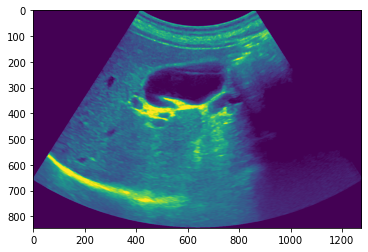

Image loaded...


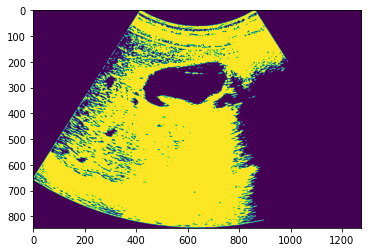

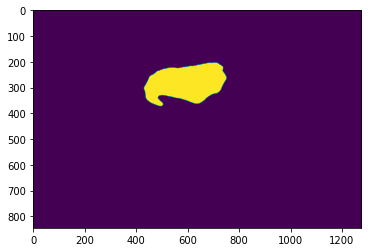

det/0002.png
Mask saved
++++++++++++++++++++++++++++++++++++++++++++++++++++++
Dimension of Image: (844, 1174)


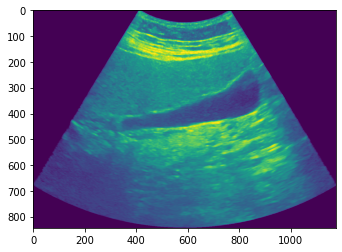

Image loaded...


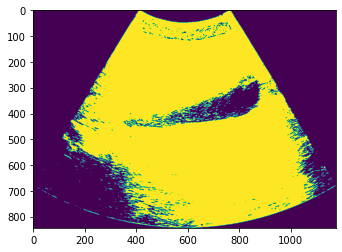

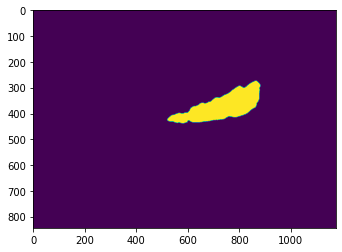

det/0007.png
Mask saved
++++++++++++++++++++++++++++++++++++++++++++++++++++++
Dimension of Image: (844, 1229)


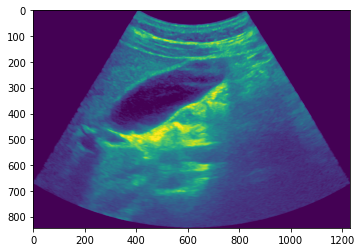

Image loaded...


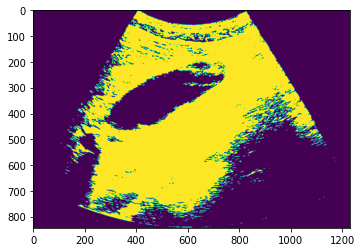

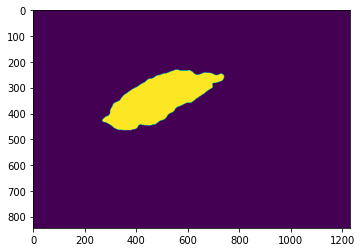

det/0004.png
Mask saved
++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [195]:
if __name__ == "__main__":
    path = os.walk('img/')
    for _, _, files in path:
        for file in files:
            output_name = file.split('.')[0] + ".png"
            image = load_image('img/' + file)
            raw_image = image.copy()

            kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
            image = cv2.filter2D(image, -1, kernel)
            image = cv2.GaussianBlur(image,(5,5), 0)
            
            mask = segment_image(image, raw_image)
            plot_image(mask)
            save_mask(mask, 'det/', output_name)
            print("++++++++++++++++++++++++++++++++++++++++++++++++++++++")

In [196]:
!python eval.py

Number of images: 10
Number of detections: 10
Number of ground truths: 10
IoU for image img/0000.jpg = 0.7233911954626925
IoU for image img/0001.jpg = 0.8209175952675747
IoU for image img/0002.jpg = 0.8514002443379382
IoU for image img/0003.jpg = 0.8499851889467225
IoU for image img/0004.jpg = 0.81443763518385
IoU for image img/0005.jpg = 0.783661161368855
IoU for image img/0006.jpg = 0.7386243991760129
IoU for image img/0007.jpg = 0.5810126582278481
IoU for image img/0008.jpg = 0.880874951606659
IoU for image img/0009.jpg = 0.579039523741305
Average IoU =  0.7623344553319458
